 # Week 8:
 File: DSC550_Paulovici_Exercise_8_3.py (.ipynb)<br>
 Name: Kevin Paulovici<br>
 Date: 5/2/2020<br>
 Course: DSC 550 Data Mining (2205-1)<br>
 Assignment: 8.3 Exercise: Original Analysis Case Study Part 1, 2, 3

 # Part 1

 ## Assignment Tasks
 Provide a short narrative describing an original idea for an analysis problem. Find or create appropriate data that can be analyzed. <br>
 Write the step-by-step instructions for completing the Graph Analysis part of your case study.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yellowbrick


In [2]:
# Step 1: load the data into a dataframe
df = pd.read_csv("survey_results_public.csv")
headers = pd.read_csv("survey_results_schema.csv", index_col="Column")


In [3]:
# Step 2: check the dimension of the table
print("The dimension of the data is: {}".format(df.shape))


The dimension of the data is: (88883, 85)


In [4]:
# Step 3 - filter the data
# include only united states respondants 
filt = (df["Country"] == "United States")

df = df.loc[filt]


In [5]:
# Step 4: check the dimension of the table
print("The dimension of the data is: {}".format(df.shape))


The dimension of the data is: (20949, 85)


In [6]:
# Step 5: display the first few rows of the dataset and header file
df.head()


,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
12,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
21,22,I am a developer by profession,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,Some college/university study without earning ...,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,47.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
22,23,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Information systems, information technology, o...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Tech...,22.0,Man,No,Straight / Heterosexual,Black or of African descent,No,Appropriate in length,Easy
25,26,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,34.0,Man,No,Gay or Lesbian,NaN,No,Appropriate in length,Easy


In [7]:
headers.sort_index(inplace=True)
headers


,QuestionText
Column,
Age,What is your age (in years)? If you prefer not...
Age1stCode,At what age did you write your first line of c...
BetterLife,Do you think people born today will have a bet...
BlockchainIs,Blockchain / cryptocurrency technology is prim...
BlockchainOrg,How is your organization thinking about or imp...
...,...
WorkPlan,How structured or planned is your work?
WorkRemote,How often do you work remotely?
WorkWeekHrs,"On average, how many hours per week do you work?"


In [8]:
# step 6: Update values for YearsCode and YearsCodePro
df["YearsCode"] = df["YearsCode"].replace({"Less than 1 year": 0, "More than 50 years":50})
df["YearsCodePro"] = df["YearsCodePro"].replace({"Less than 1 year": 0, "More than 50 years":50})


In [9]:
# Step 7: Convert YearsCode and YearsCodePro to numerics
df['Age'] = pd.to_numeric(df['Age'],errors='coerce')
df['YearsCode'] = pd.to_numeric(df['YearsCode'],errors='coerce')
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'],errors='coerce')


In [10]:
# step 8: summary data for select features
# age
df["Age"].describe()


count    18864.000000
mean        32.753281
std         10.495166
min          1.000000
25%         25.000000
50%         31.000000
75%         38.000000
max         99.000000
Name: Age, dtype: float64

In [11]:
# YearsCode
df["YearsCode"].describe()


count    20790.000000
mean        13.970996
std         10.481683
min          0.000000
25%          6.000000
50%         10.000000
75%         20.000000
max         50.000000
Name: YearsCode, dtype: float64

In [12]:
# YearsCode
df["YearsCodePro"].describe()


count    18359.000000
mean         9.915845
std          9.002617
min          0.000000
25%          3.000000
50%          7.000000
75%         14.000000
max         50.000000
Name: YearsCodePro, dtype: float64

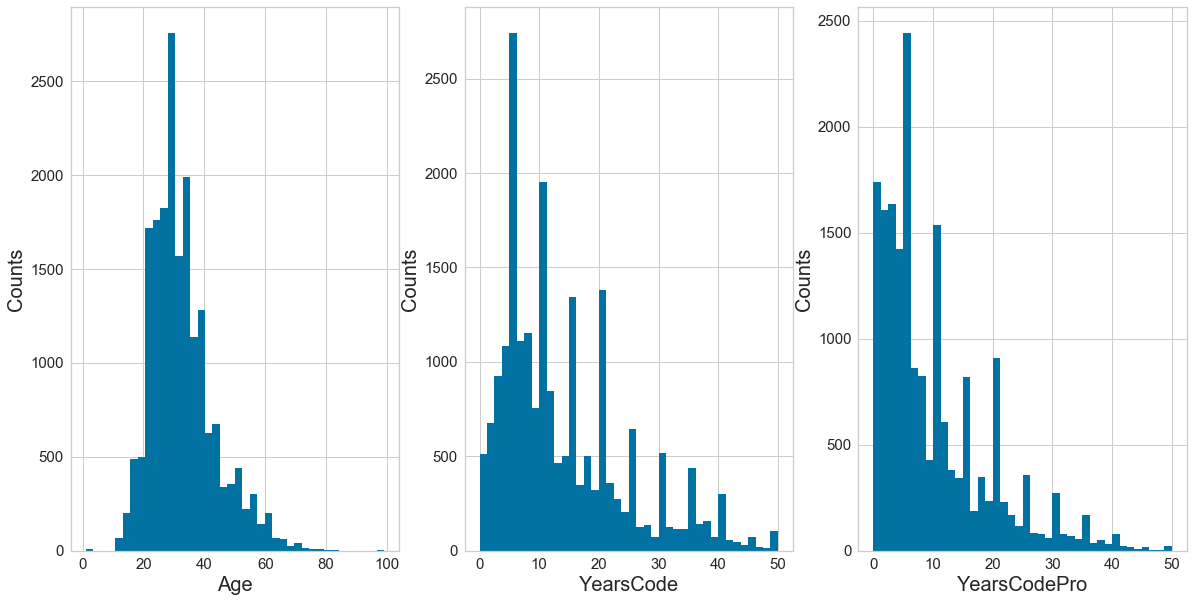

In [13]:
# Step 9: Create histograms of Age, YearsCode, and YearsCodePro
# set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 3)

# Specify the features of interest
num_features = ['Age', 'YearsCode', 'YearsCodePro']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()


In [14]:
# Step 10: Replace Values for Opensourcer & Employment
# df.rename(columns={"OpenSourcer":"OpenSourcer/year"})
df["OpenSourcer"] = df["OpenSourcer"].replace({"Less than once per year": "< 1 / year", "Once a month or more often": "> 1 / month", "Less than once a month but more than once per year":"< 1 / month"})

df["Employment"] = df["Employment"].replace(
    {"Employed full-time":"Full-Time",
    "Employed part-time": "Part-Time",
    "Independent contractor, freelancer, or self-employed": "Independent",
    "Not employed, and not looking for work":"Not & ot looking",
    "Not employed, but looking for work":"Not & looking"})


In [15]:
# Step 11: Filter Gender to man and woman only
filt = (df["Gender"] == "Man") | (df["Gender"] == "Woman")
df = df.loc[filt]
df.shape


(19792, 85)

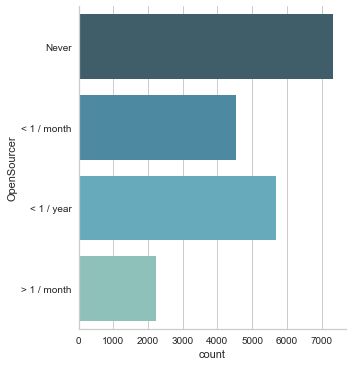

In [16]:
# Step 12: Create histograms of OpenSourcer, Gender, Hobbyist, Student, JobSat, MgrIdiot
sns.catplot(y="OpenSourcer", palette="GnBu_d", kind="count", data=df)


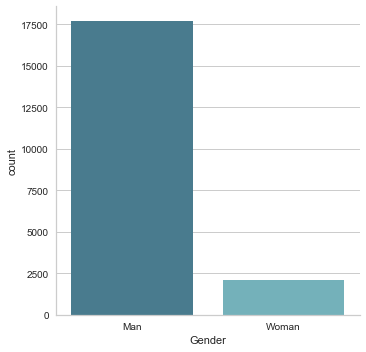

In [17]:
sns.catplot(x="Gender", palette="GnBu_d", kind="count", data=df)

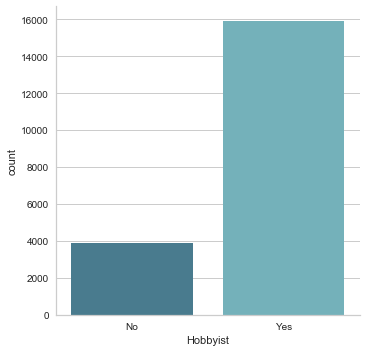

In [18]:
sns.catplot(x="Hobbyist", palette="GnBu_d", kind="count", data=df)


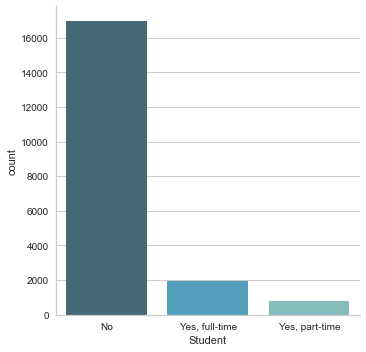

In [19]:
sns.catplot(x="Student", palette="GnBu_d", kind="count", data=df)

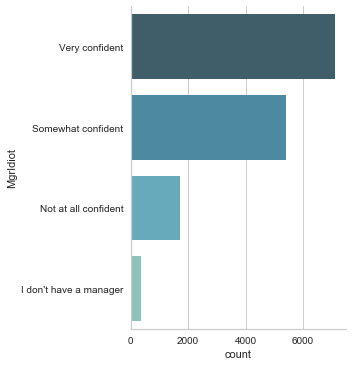

In [20]:
sns.catplot(y="MgrIdiot", palette="GnBu_d", kind="count", data=df)


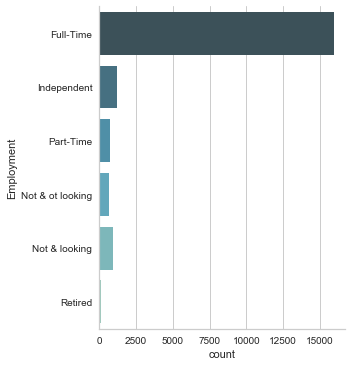

In [21]:
sns.catplot(y="Employment", palette="GnBu_d", kind="count", data=df)


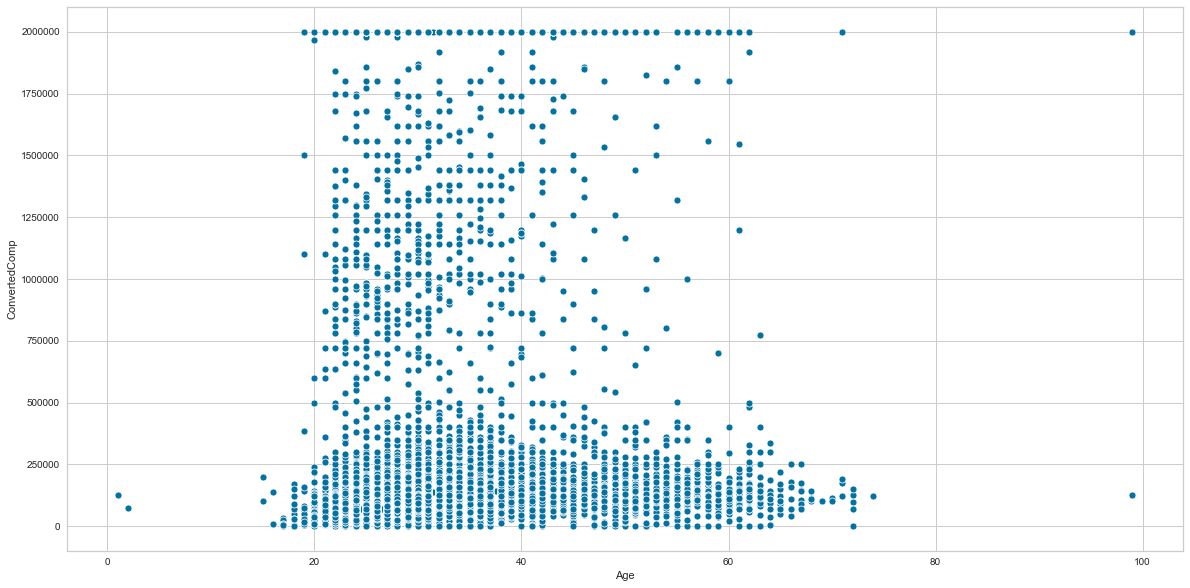

In [22]:
# step 13: Scatter/Histogram plots of Salary Vs. Age
sns.scatterplot(y="ConvertedComp", x="Age", palette="GnBu_d", data=df)


In [23]:
# histogram of Salary
# how many values are below 500K
filt = df["ConvertedComp"] < 500000
df_500 = df.loc[filt]
df_500.ConvertedComp.describe()


count     13127.000000
mean     116373.503466
std       62200.536300
min           0.000000
25%       76000.000000
50%      105000.000000
75%      140000.000000
max      490600.000000
Name: ConvertedComp, dtype: float64

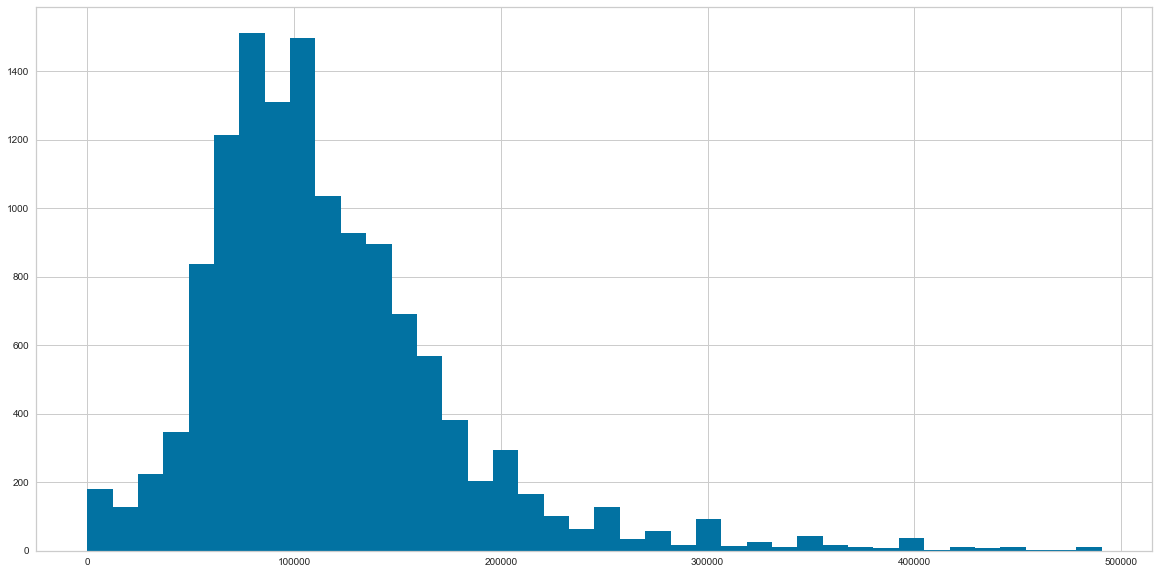

In [24]:
temp = df_500["ConvertedComp"]
plt.hist(temp, bins=40)
plt.show()


 # Part 2

 ## Assignment Tasks
 Create Part 2 of your Analysis Case Study project. Part 2 should consist of Dimensionality and Feature Reduction. You can use any methods/tools you think are most appropriate. <br><br>
 Write the step-by-step instructions for completing the Dimensionality and Feature Reduction part of your case study.

In [25]:
# Recap of filter done so far (dimensionality reduction)
# Step 3 included only for United States and Python users
# step 11 included only man and woman as genders


In [26]:
# Step 14: Additional filter

# employement, remove anyone not currently employeed 
filt = (df["Employment"] == "Full-Time") | (df["Employment"] == "Part-Time") | (df["Employment"] == "Independent")
df = df.loc[filt]


In [27]:
print("The dimension of the data is: {}".format(df.shape))


The dimension of the data is: (17899, 85)


In [28]:
# age, only include age range 18 - 65
filt = (df["Age"] > 17) & (df["Age"] < 66)
df = df.loc[filt]


In [29]:
# ConvertedComp (Salary) 
filt = (df["ConvertedComp"] < 500000)
df = df.loc[filt]
print("The dimension of the data is: {}".format(df.shape))


The dimension of the data is: (12579, 85)


In [30]:
# Step 15: Remove features not of interest
# features = ["MainBranch", "Hobbyist", "OpenSourcer", "Employment", "Student",
# "OrgSize","YearsCode","YearsCodePro","CareerSat","JobSat","MgrIdiot",
# "ConvertedComp","WorkWeekHrs","WorkLoc","LanguageWorkedWith","OpSys","BetterLife",
# "Age","Gender","Dependents"]

features = ["MainBranch", "Hobbyist", "Employment", "OpenSourcer", "YearsCode","YearsCodePro","CareerSat",
"ConvertedComp","WorkWeekHrs", "Age","Gender"]

df = df[features]

df.shape


(12579, 11)

In [31]:
headers = pd.read_csv("survey_results_schema.csv")


In [32]:
# filt = (headers["Column"] == "MainBranch") | (headers["Column"] == "Hobbyist") | (headers["Column"] == "OpenSourcer") | (headers["Column"] == "Employment") | (headers["Column"] == "Student") | (headers["Column"] == "OrgSize") | (headers["Column"] == "YearsCode") | (headers["Column"] == "YearsCodePro") | (headers["Column"] == "CareerSat") | (headers["Column"] == "JobSat") | (headers["Column"] == "MgrIdiot") | (headers["Column"] == "ConvertedComp") | (headers["Column"] == "WorkWeekHrs") | (headers["Column"] == "WorkLoc") | (headers["Column"] == "LanguageWorkedWith") | (headers["Column"] == "OpSys") |(headers["Column"] == "BetterLife") | (headers["Column"] == "Age") | (headers["Column"] == "Gender") | (headers["Column"] == "Dependents")

filt = (headers["Column"] == "MainBranch") | (headers["Column"] == "Hobbyist") | (headers["Column"] == "OpenSourcer") | (headers["Column"] == "Employment") | (headers["Column"] == "YearsCode") | (headers["Column"] == "YearsCodePro") | (headers["Column"] == "ConvertedComp") | (headers["Column"] == "WorkWeekHrs") | (headers["Column"] == "Age") | (headers["Column"] == "Gender")

headers = headers.loc[filt]
headers.set_index("Column")
headers.sort_index(inplace=True)
headers


,Column,QuestionText
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
5,Employment,Which of the following best describes your cur...
13,YearsCode,"Including any education, how many years have y..."
15,YearsCodePro,How many years have you coded professionally (...
31,ConvertedComp,Salary converted to annual USD salaries using ...
32,WorkWeekHrs,"On average, how many hours per week do you work?"
77,Age,What is your age (in years)? If you prefer not...
78,Gender,Which of the following do you currently identi...


In [33]:
# step 16: na values
df = df.dropna()
df.shape 


(12486, 11)

 # Part 3

In [34]:
# step 17: create target column
# print(df.ConvertedComp)

# avg = 246592.5
avg = df.ConvertedComp.mean()

df["Above_Below_Avg_Sal"] = ""

for index, row in df.iterrows():
    if row.ConvertedComp < avg:
        df.at[index, 'Above_Below_Avg_Sal'] = "Below Avg"
    else:
        df.at[index, 'Above_Below_Avg_Sal'] = "Above Avg"

df.Above_Below_Avg_Sal.describe()


count         12486
unique            2
top       Below Avg
freq           7307
Name: Above_Below_Avg_Sal, dtype: object

In [35]:
# step 18: convert categorical data to numbers

# categorical features
cat_features = ['MainBranch','Hobbyist','OpenSourcer','Employment', 'Gender']
df_cat = df[cat_features]

#one hot encoding
df_cat_dummies = pd.get_dummies(df_cat)

print(df_cat_dummies.head())


    MainBranch_I am a developer by profession  \
3                                           1   
12                                          1   
21                                          1   
22                                          1   
25                                          1   

    MainBranch_I am not primarily a developer, but I write code sometimes as part of my work  \
3                                                   0                                          
12                                                  0                                          
21                                                  0                                          
22                                                  0                                          
25                                                  0                                          

    Hobbyist_No  Hobbyist_Yes  OpenSourcer_< 1 / month  \
3             1             0                        0   
12          

In [36]:
# step 19: create whole features dataset for train/validation data splitting

# combine numerical data & dummie features together
features_model = ['YearsCodePro','WorkWeekHrs','Age']
df_model_x = df[features_model]
# df_model_x = pd.concat([df[features_model], df_cat_dummies], axis=1)
# set the target dataset
df_model_y = df['Above_Below_Avg_Sal']

# separate data into training and validation and check the details of the datasets
# import packages
from sklearn.model_selection import train_test_split

# split the data
x_train, x_val, y_train, y_val = train_test_split(df_model_x, df_model_y, test_size =0.3, random_state=11)

# number of samples in each set
print("No. of samples in training set: ", x_train.shape[0])
print("No. of samples in validation set:", x_val.shape[0])

# Above / Below Avg
print('\n')
print('No. of Above / Below Avg in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of Above / Below Avg in the validation set:')
print(y_val.value_counts())


No. of samples in training set:  8740
No. of samples in validation set: 3746


No. of Above / Below Avg in the training set:
Below Avg    5134
Above Avg    3606
Name: Above_Below_Avg_Sal, dtype: int64


No. of Above / Below Avg in the validation set:
Below Avg    2173
Above Avg    1573
Name: Above_Below_Avg_Sal, dtype: int64


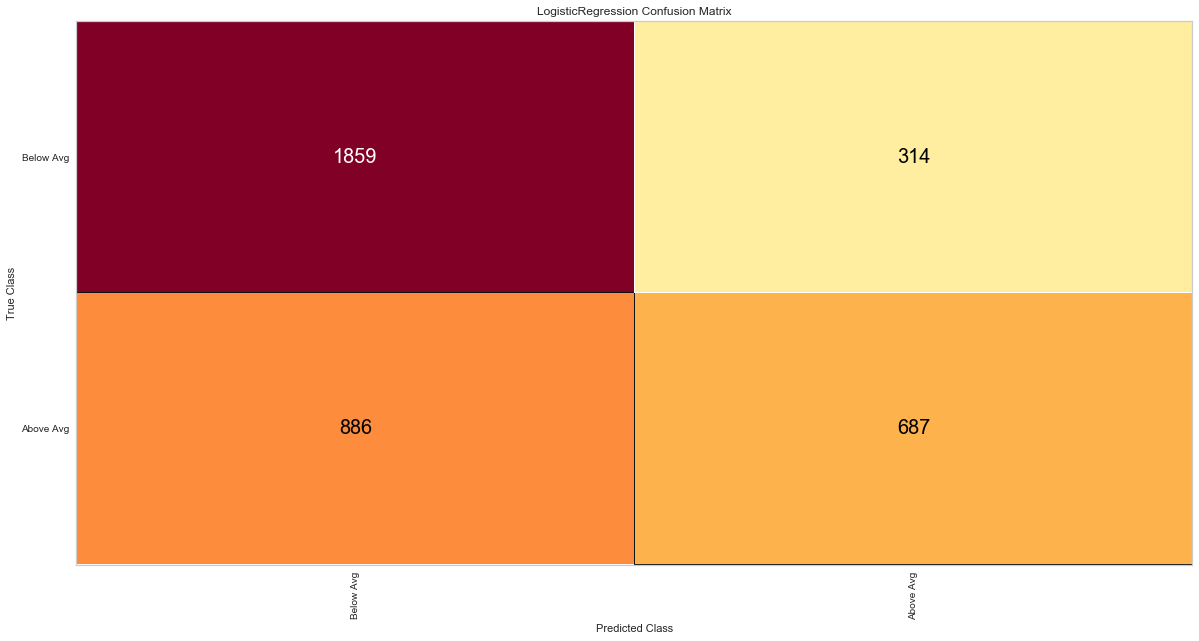

In [37]:
# step 20: Eval Metrics
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model 
model = LogisticRegression()

#The ConfusionMatrix visualizer taxes a model
classes = ['Below Avg','Above Avg']
cm = ConfusionMatrix(model, classes=classes, percent=False)

# fit the model
cm.fit(x_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(x_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()


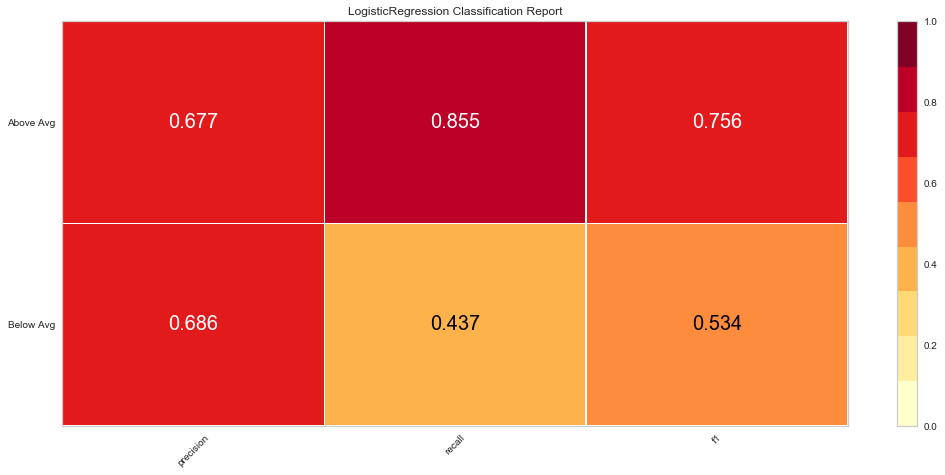

In [38]:
# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()


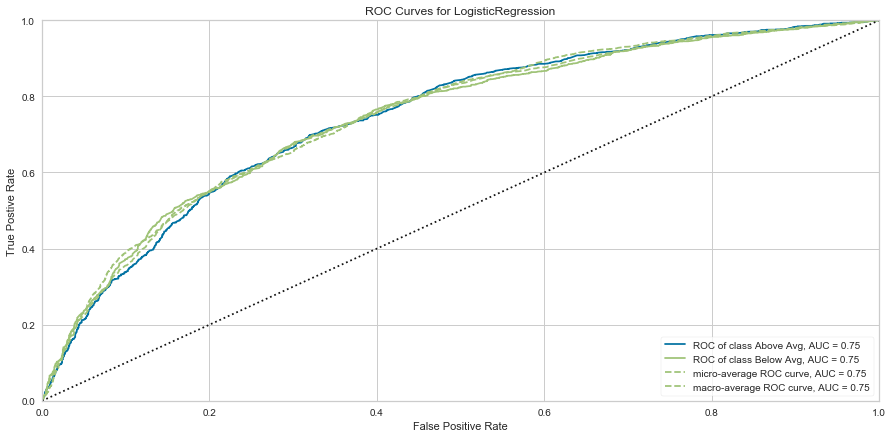

In [39]:
# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model)

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()
